<a href="https://colab.research.google.com/github/joowop/Metaverse_AI_Project/blob/main/multi_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"joowop","key":"6379bbc7961fa0c8236cd0b82fc482f7"}'}

In [ ]:
# 업로드
!ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d airplane2230/apparel-image-dataset-2

 98% 244M/249M [00:01<00:00, 194MB/s]
100% 249M/249M [00:01<00:00, 210MB/s]


In [ ]:
!unzip apparel-image-dataset-2.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: clothes_dataset/brown_shoes/2d202ed49ac15aeff75681b0d78c322c68852785.jpg  
  inflating: clothes_dataset/brown_shoes/2df99267923b05486744f5fe59ffb9dbf0dce133.jpg  
  inflating: clothes_dataset/brown_shoes/2e94cdf3e3020cad6ad91f01cf75264a270908c6.jpg  
  inflating: clothes_dataset/brown_shoes/2e9ec5a783dd8eb88af84a2fa01dd44ec0837e19.jpg  
  inflating: clothes_dataset/brown_shoes/2ee1746aacd7d31ab3a941934a11b9b34ae884bc.jpg  
  inflating: clothes_dataset/brown_shoes/2f098f41527b7ef3404c1df984f775d21b10df15.jpg  
  inflating: clothes_dataset/brown_shoes/2fbff880bb5d7c001b8993372107a9d06ac44a7f.jpg  
  inflating: clothes_dataset/brown_shoes/3034f61d1f09748763c3e1b0dadd915392b1278b.jpg  
  inflating: clothes_dataset/brown_shoes/30a1704559dec214b60e8bfad6826fdfadf1f87a.jpg  
  inflating: clothes_dataset/brown_shoes/30ef20bcb027c99409c81fd6127957502b0e693e.jpg  
  inflating: clothes_dataset/brown_shoes/312cf581fd4ec3678b8794f9f488aa1dad2f2908.jp

## 정답 값 살펴보기

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('train.csv', index_col=0)
train_df
# x데이터는 image,  정답 데이터는 black	blue	brown	green	red	white	dress	shirt	pants	shorts	shoes

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./clothes_dataset\blue_shorts\256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,./clothes_dataset\red_pants\584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,./clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,./clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5573,./clothes_dataset\black_shoes\31e11164a2a206ec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5574,./clothes_dataset\white_shoes\00271191db9b1fd6...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5575,./clothes_dataset\black_pants\afa29481cd27a475...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5576,./clothes_dataset\green_shoes\aaeba68f98a07bf7...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_df = pd.read_csv('test.csv', index_col=0)
# train으로 학습을 시키면서 중간에 검증을 하기 위해 val을 사용 (필요없을 때도 있다.)
val_df = pd.read_csv('val.csv', index_col=0)


- 여기 데이터에서 문제는 image의 경로 문제 이다. (리눅스에서는 경로가 슬래쉬, 윈도우는 역슬래쉬.)

- ex) './data\123.jpg'.replace('\\', '/')


# 데이터 가공

In [ ]:
train_df.iloc[:,0] = train_df.iloc[:,0].str.replace('\\','/')
train_df.iloc[0]['image']

<ipython-input-21-f6b55e0bacea>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df.iloc[:,0] = train_df.iloc[:,0].str.replace('\\','/')


'./clothes_dataset/blue_shorts/256d854b55ac32ea4d0d6398dffccc4d8909a388.jpg'

In [ ]:
test_df.iloc[:,0] = test_df.iloc[:,0].str.replace('\\','/')
test_df.iloc[0]['image']

<ipython-input-22-f04b82bb267e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df.iloc[:,0] = test_df.iloc[:,0].str.replace('\\','/')


'./clothes_dataset/blue_shorts/1ec871cdfe41ff2093fff53f11f315f2027396cc.jpg'

In [ ]:
val_df.iloc[:,0] = val_df.iloc[:,0].str.replace('\\','/')
val_df.iloc[0]['image']

<ipython-input-23-299dc644c35b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  val_df.iloc[:,0] = val_df.iloc[:,0].str.replace('\\','/')


'./clothes_dataset/black_shirt/caf19003d77246a848e377fd649f0f58ba05d1f5.jpg'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# 데이터 증강

In [ ]:
# 제네레이터 생성 ( 비전 쪽은 제네레이터를 꼭 사용해야한다. )
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
# 제네레이터 두개 만드는 이유 : 왜 따로 만들었을까? =>
## train에는 반전이나 상하 반전이 필요할때가 있다. 하지만 test데이터에서는 반전이나 회전이 필요없기 때문이다.(test에는 스케일러만 조정해서 사용하면 된다.)

batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 'dress',
       'shirt', 'pants', 'shorts', 'shoes']

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = './', # train_df안에 image 데이터 안에 풀 경로가 다 들어가있기때문에 굳이 설정 안해도됨
    x_col = 'image', # image 데이터를 사용
    y_col = class_col,
    target_size = (112,112), # image size, 학습이 잘 안되는 이유: 이미지가 112로 맞춰져서 찌그러진다.
    color_mode = 'rgb',
    class_mode = 'other', # categorycal을 쓰면 가장 높은 것만 뽑기 때문에 안된다. 이진도 아니고, multi_label은 other로 사용
    batch_size = batch_size,
    seed = 100
)

test_generator = val_datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = './',
    x_col = 'image',
    y_col = class_col,
    target_size = (112,112),
    color_mode = 'rgb',
    class_mode = 'other',
    batch_size = batch_size,
    shuffle = False
    # 검증할때는 seed를 쓸 필요가 없다. 100으로 고정하기보다는 test이기 때문에 랜덤하게 섞어준다.
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = './',
    x_col = 'image',
    y_col = class_col,
    target_size = (112,112),
    color_mode = 'rgb',
    class_mode = 'other',
    batch_size = batch_size,
    shuffle = True
    # 검증할때는 seed를 쓸 필요가 없다. 100으로 고정하기보다는 test이기 때문에 랜덤하게 섞어준다.
)

Found 5578 validated image filenames.
Found 3416 validated image filenames.
Found 2391 validated image filenames.


In [ ]:
len(test_generator)
# 배치가 107개로 되어있다. 하나의 배치당 32개가 들어가 있는것이 107가 있다.라는 뜻
# 한번 epchoc을 돌리면 107번 돌아간다는 뜻

107

# 모델 만들기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = (112, 112, 3))) # 3인 이유는 컬러를 그대로 쓰겠다 라는 뜻임. (3채널 3개의 a4용지를 한줄로 평평하게 쭉 폈다?)
model.add(Dense(128, activation = 'relu')) # 역전파 시킬때 기울기 소실 문제 때문에 relu로 사용
model.add(Dense(64, activation = 'relu'))
model.add(Dense(11, activation = 'sigmoid'))
# sigmoid는 이진분류 아닌가요?(softmax를 안쓴 이유) -> softmax는 마지막에 하나만 나온다. 각각의 클래스가 0~1사이에서 찾아질것이다. 0인 확률 1인 확률이 구해진다.
# 붉은색일 확률이 0.8정도가 나오면 이건 붉은 색이구나라고 알수 있게 된다. 즉, 각각을 이진분류해서 찾는것이다.

# multilable에서는 binary_crossentropy 사용
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.fit(train_generator, validation_data = val_generator, epochs = 20)

# 검증데이터의 정확도가 왔다갔다 하거나 변화가 없으면 과적합 되고 있다는 뜻으로 끊고 모델 수정하는것이 좋다.

Epoch 1/20
175/175 [==============================] - 30s 168ms/step - loss: 0.5102 - acc: 0.3340 - val_loss: 0.3117 - val_acc: 0.4793
Epoch 2/20
175/175 [==============================] - 28s 158ms/step - loss: 0.2798 - acc: 0.4511 - val_loss: 0.2560 - val_acc: 0.5031
Epoch 3/20
175/175 [==============================] - 28s 163ms/step - loss: 0.2591 - acc: 0.4837 - val_loss: 0.2548 - val_acc: 0.5061
Epoch 4/20
175/175 [==============================] - 29s 166ms/step - loss: 0.2378 - acc: 0.5084 - val_loss: 0.2383 - val_acc: 0.5295
Epoch 5/20
175/175 [==============================] - 29s 168ms/step - loss: 0.2209 - acc: 0.5366 - val_loss: 0.2467 - val_acc: 0.5885
Epoch 6/20
175/175 [==============================] - 29s 163ms/step - loss: 0.2079 - acc: 0.5590 - val_loss: 0.1994 - val_acc: 0.5542
Epoch 7/20
175/175 [==============================] - 30s 170ms/step - loss: 0.1960 - acc: 0.5697 - val_loss: 0.2586 - val_acc: 0.4914
Epoch 8/20
175/175 [==============================] - 2

In [ ]:
# 이 실습은 multilable(색깔, 종류) 가장 높은 걸 두개 뽑아서 정확도를 측정한다. (컬럼마다 바이너리가 진행이 된다.)
#  class_mode = 'other'로 세팅하면 학습이 된 후  multilable(색깔, 종류) 이런식으로 뽑히게 된다. (마지막껄 다 더하면 1이 넘는다 ㄷ)
# categorycal한 데이터(softmax)는 가장 높은 걸 하나만 뽑아서 정확도를 확인한다. (마지막껄 다 합치면 1이 된다.)
# multilable은 정확도가 잘 나오게 하려면 데이터 셋이 잘 되어 있어야한다.

# 중요한건 잘 못 맞춘다..!!


In [ ]:
# 틀린것 부터 찾아야한다. 카테고리에서 신발을 못찾는지 옷을 못찾는지 색깔을 못찾는지를 찾아야한다.
# 그 다음 leaninglate 수정하던지 신경망을 더 쌓던지 해야한다.

In [ ]:
pred = model.predict(test_generator)
pred[0]

107/107 [==============================] - 11s 107ms/step


array([1.2855939e-04, 2.4395391e-01, 2.6974548e-04, 1.2478355e-03,
       6.3080079e-05, 9.7422451e-01, 6.4907814e-03, 8.6869992e-04,
       7.3098451e-01, 6.4422823e-02, 1.5306824e-01], dtype=float32)

In [ ]:
pred[0].round(3)

array([0.   , 0.244, 0.   , 0.001, 0.   , 0.974, 0.006, 0.001, 0.731,
       0.064, 0.153], dtype=float32)

In [ ]:
pred[0].argsort()[::-1]

array([ 5,  8,  1, 10,  9,  6,  3,  7,  2,  0,  4])

In [ ]:
model.evaluate(test_generator)

107/107 [==============================] - 11s 105ms/step - loss: 0.1739 - acc: 0.6358


[0.1739158183336258, 0.635831356048584]

white
pants
shoes
blue
shoes
green
black
shorts
green
shoes
red
pants
shirt
black
shoes
black


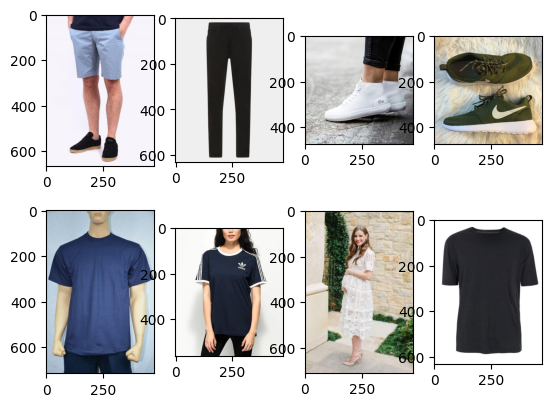

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i, temp in enumerate(pred[:8]):
    plt.subplot(2,4,i+1) # 2행 4열
    image = plt.imread(test_df['image'][i])
    print(class_col[pred[i].argsort()[::-1][0]])
    print(class_col[pred[i].argsort()[::-1][1]])
    print('=======================================')
    plt.imshow(image)

## CNN 은 픽셀이 이동하면서 특징을 찾아내준다.
#### 위와 같은 작업은 multilable은 CNN으로 해주는게 좋다.
- 이미지가 회전을 해도 특징점을 갖고 있기때문에 상관없이 잘 찾아낸다.